# Reto Titanic
### Materia: TC3006C

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
# Open test.csv and count the number of rows
df_test = pd.read_csv('./data/test.csv')
print(df_test.shape[0])
# Open train.csv and count the number of rows
df_train = pd.read_csv('./data/train.csv')
print(df_train.shape[0])

418
891


---
## Análisis Exploratorio de Datos

In [175]:
# Get missing percentage per column in df_train
missing_values = df_train.isnull().mean() * 100
print(missing_values)   

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


### Input information info age by the column name with title and mean

---
# Drop cabin column due to the high number of missing values

In [176]:
# Drop cabin column
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])
# Count the number of missing values in the df_train dataset
print("Train dataset")
missing_values = df_train.isnull().mean() * 100
print(missing_values)
print("*"*50)
print("Test dataset")
missing_values = df_test.isnull().mean() * 100
print(missing_values)

Train dataset
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64
**************************************************
Test dataset
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Embarked        0.000000
dtype: float64


In [177]:
# Generate a df of the df['Sex'] == 'male' and df['Survived'] == 1 
male_survived = df_train[df_train['Sex'] == 'male']
female_survived = df_train[df_train['Sex'] == 'female']

In [178]:
# Separate title from name column
df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# For every title, obtain the mean of the age
title_mean_age = df_train.groupby('Title')['Age'].mean()

# Fill missing values in Age column with the mean of the title plus one standard deviation
for title, mean_age in title_mean_age.items():
    df_train.loc[(df_train['Age'].isnull()) & (df_train['Title'] == title), 'Age'] = mean_age + title_mean_age.std()
    df_test.loc[(df_test['Age'].isnull()) & (df_test['Title'] == title), 'Age'] = mean_age + title_mean_age.std()

# Round the age column to the nearest integer
df_train['Age'] = df_train['Age'].round()
df_test['Age'] = df_test['Age'].round()

# Count the number of missing values in the df_train dataset
missing_values = df_train.isnull().mean() * 100
print(missing_values)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
Title          0.000000
dtype: float64


---

### Drop embarked rows with missing values

In [179]:
# Drop embarked rows with missing values
df_train = df_train.dropna(subset=['Embarked'])

# Count the number of missing values in the df_train dataset
print("Train dataset")
missing_values = df_train.isnull().mean() * 100
print(missing_values)
print("*"*50)
print("Test dataset")
missing_values = df_test.isnull().mean() * 100
print(missing_values)

Train dataset
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Title          0.0
dtype: float64
**************************************************
Test dataset
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.239234
Embarked       0.000000
Title          0.000000
dtype: float64


---
### Drop rows with missing values in Fare column

In [180]:
# Drop rows with missing values in Fare column
df_test = df_test.dropna(subset=['Fare'])

# Count the number of missing values in the df_train dataset
print("Train dataset")
missing_values = df_train.isnull().mean() * 100
print(missing_values)
print("*"*50)
print("Test dataset")
missing_values = df_test.isnull().mean() * 100
print(missing_values)

Train dataset
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Title          0.0
dtype: float64
**************************************************
Test dataset
PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Title          0.0
dtype: float64


In [181]:
# Drop Ticket column
df_train = df_train.drop(columns=['Ticket'])
df_test = df_test.drop(columns=['Ticket'])

---

### 

## Segment by age of passengers and using pivot tables to analyze the survival rate

In [197]:
# Segment by age of passengers and using pivot tables to analyze the survival rate
age_bins = [0, 13, 18, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-12', '13-17', '18-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-80']
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)

age_group_survival = df_train.pivot_table(index='AgeGroup', values='Survived')
# Order from highest to lowest survival rate
age_group_survival = age_group_survival.sort_values(by='Survived', ascending=False)
print(age_group_survival)


# Conditional probability of survival given the age group and sex


          Survived
AgeGroup          
0-12      0.585714
50-59     0.516667
30-39     0.473684
13-17     0.411765
20-29     0.363636
18-19     0.311111
70-80     0.250000
40-49     0.231527
60-69     0.176471


In [204]:
# Paso 1: Contar las ocurrencias conjuntas de Group Age y Sex
joint_counts = df_train.groupby(['Sex', 'AgeGroup']).size().unstack(fill_value=0)

# Paso 2: Calcular la probabilidad condicional P(Group Age | Sex)
conditional_probabilities = joint_counts.div(joint_counts.sum(axis=1), axis=0)
print(conditional_probabilities*100)

AgeGroup       0-12      13-17     18-19      20-29      30-39      40-49  \
Sex                                                                         
female    10.897436  10.897436  2.884615  26.282051  28.525641   9.935897   
male       6.250000   5.902778  6.250000  25.868056  17.534722  29.861111   

AgeGroup     50-59     60-69     70-80  
Sex                                     
female    9.935897  0.641026  0.000000  
male      5.034722  2.604167  0.694444  


In [209]:
# Paso 1: Contar las ocurrencias conjuntas de Sex, Group Age y Survived
joint_counts_survived = df_train.groupby(['Sex', 'AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Paso 2: Calcular la probabilidad condicional P(Survived = 1 | Sex, Group Age)
survived_counts = joint_counts_survived[1]
conditional_probabilities_survived = survived_counts.div(joint_counts_survived.sum(axis=1))
print(conditional_probabilities_survived*100)

Sex     AgeGroup
female  0-12         61.764706
        13-17        73.529412
        18-19        77.777778
        20-29        74.390244
        30-39        75.280899
        40-49        67.741935
        50-59        87.096774
        60-69       100.000000
        70-80              NaN
male    0-12         55.555556
        13-17         8.823529
        18-19        19.444444
        20-29        15.436242
        30-39        22.772277
        40-49        15.116279
        50-59        13.793103
        60-69         6.666667
        70-80        25.000000
dtype: float64


In [194]:
# Generate df['Surname'] column from df['Name'] until comma example: Braund, Mr. Owen Harris -> Braund
df_train['Surname'] = df_train['Name'].str.extract('([A-Za-z]+),', expand=True)

In [196]:
df_train['Surname'].describe()

count           889
unique          664
top       Andersson
freq              9
Name: Surname, dtype: object

In [ ]:
# When df['Surname'] appears more than once, it is considered a family and from the family depending on the df_train['age_group'] generate an extra column called ''

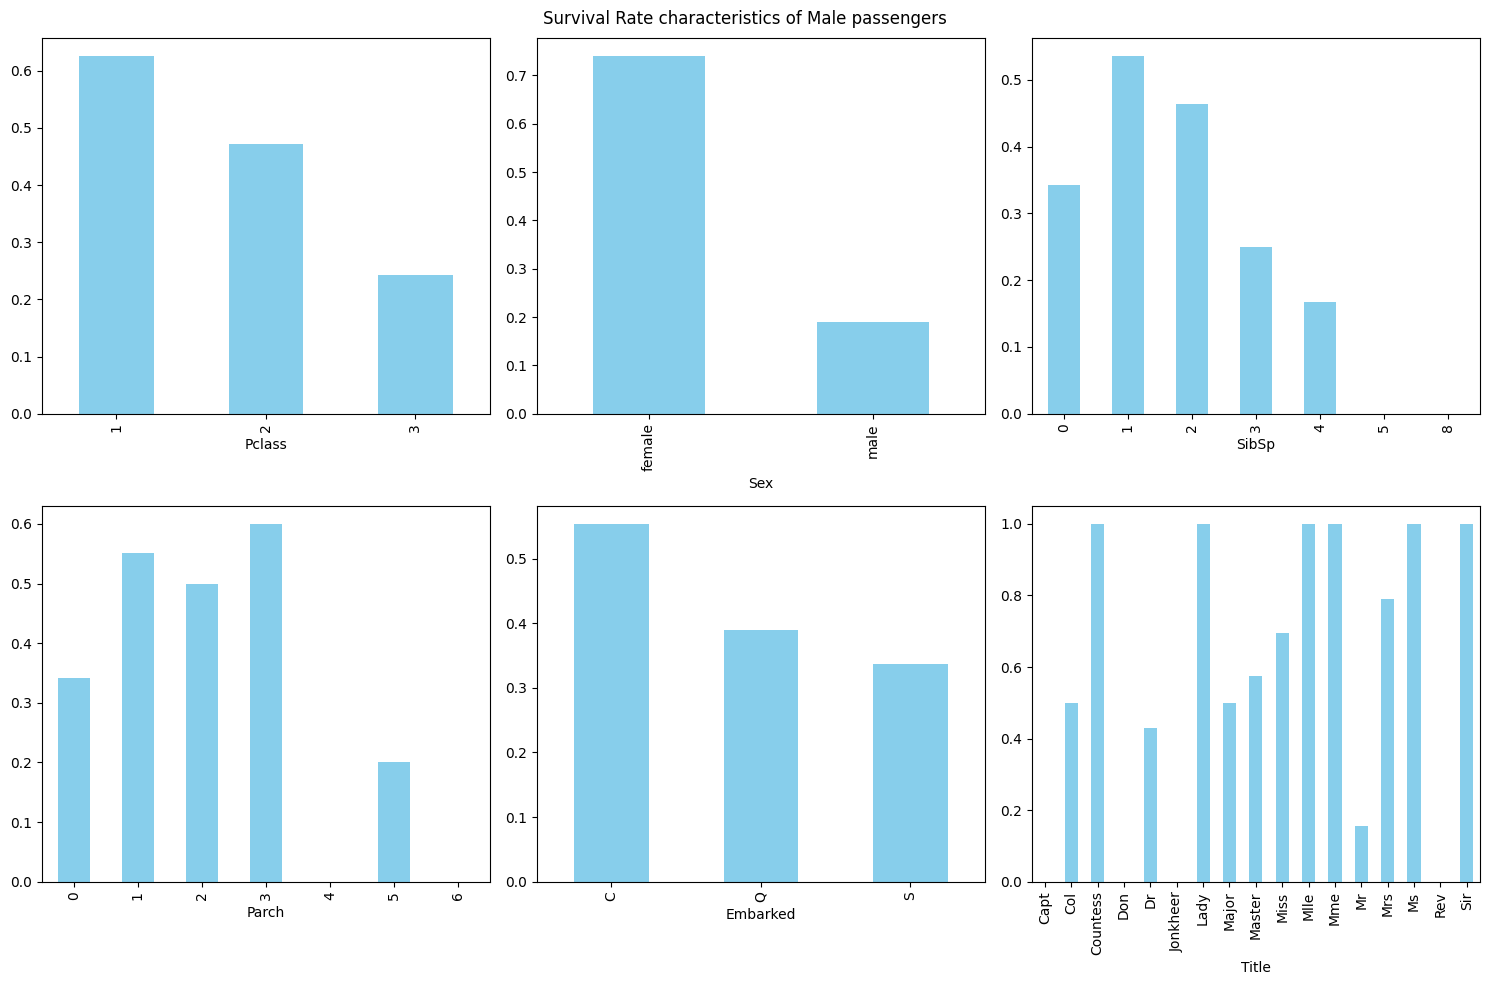

In [184]:
# Make a subplot of every column in df_train as index for the pivot table
df_train_analisis = df_train.drop(columns=['PassengerId', 'Name', 'Age','Survived', 'Fare'])
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Survival Rate characteristics of Male passengers')

for i, col in enumerate(df_train_analisis.columns):
    pivot = df_train.pivot_table(index=col, columns='Survived', aggfunc='size', fill_value=0)
    # Survival rate by column
    pivot['Survival Rate'] = pivot[1] / (pivot[0] + pivot[1])
    pivot['Survival Rate'].plot(kind='bar', ax=axs[i//3, i%3], color='skyblue')

plt.tight_layout()
plt.show()

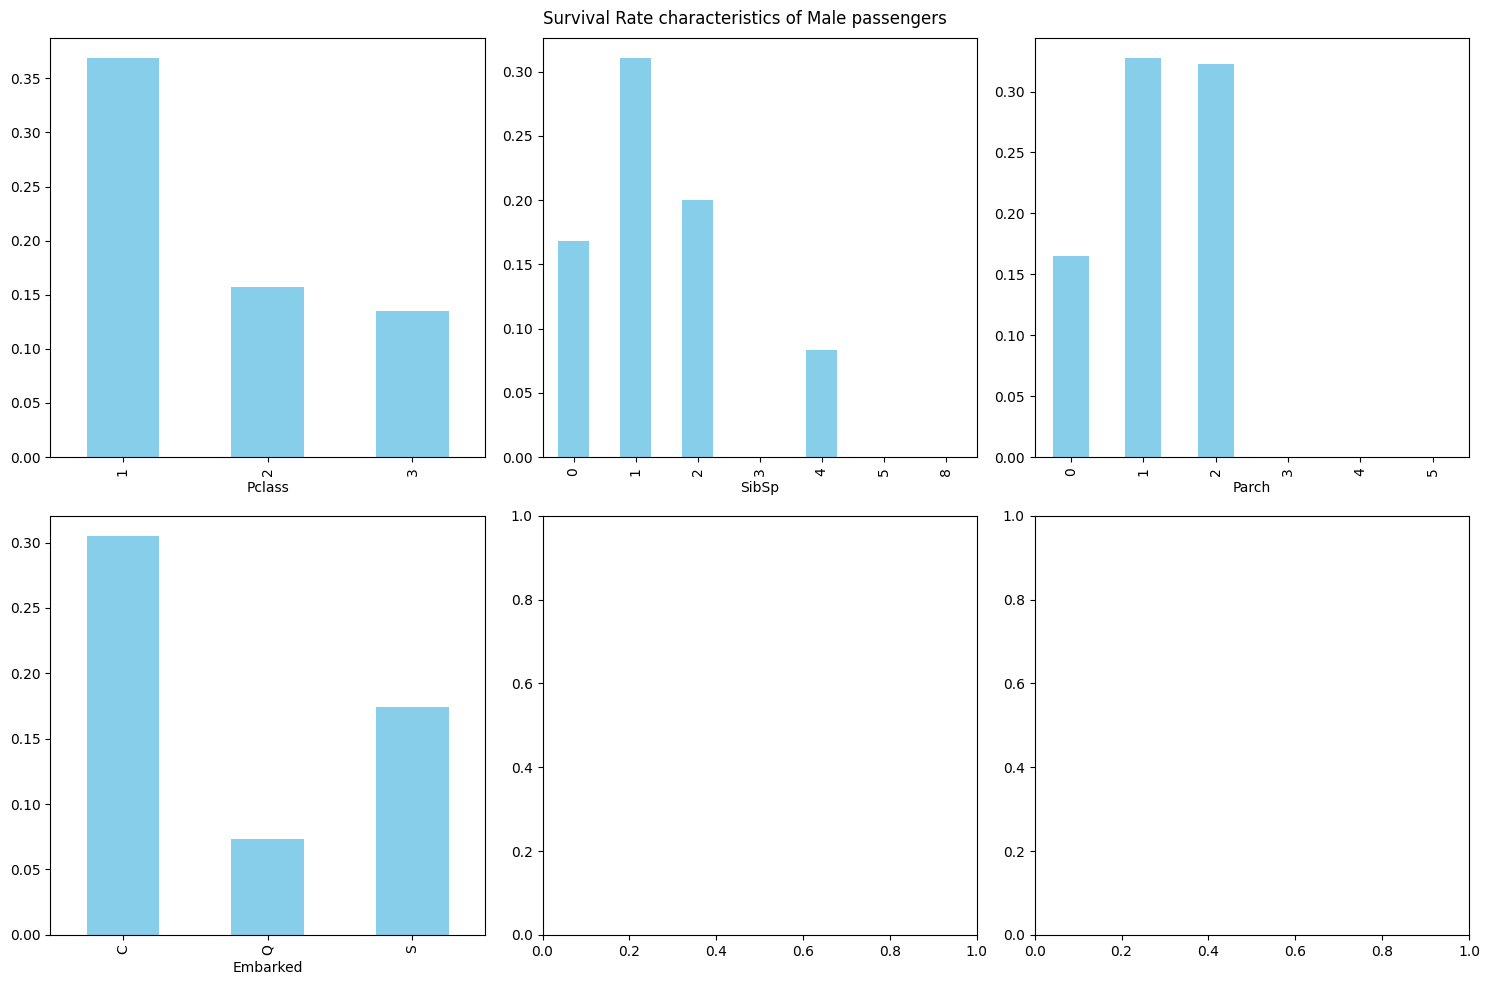

In [185]:
# Make a subplot of every column in df_train as index for the pivot table
df_train_analisis = male_survived.drop(columns=['PassengerId', 'Name', 'Ticket', 'Age','Survived', 'Fare', 'Sex'])
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Survival Rate characteristics of Male passengers')

for i, col in enumerate(df_train_analisis.columns):
    pivot = male_survived.pivot_table(index=col, columns='Survived', aggfunc='size', fill_value=0)
    # Survival rate by column
    pivot['Survival Rate'] = pivot[1] / (pivot[0] + pivot[1])
    pivot['Survival Rate'].plot(kind='bar', ax=axs[i//3, i%3], color='skyblue')

plt.tight_layout()
plt.show()


# #Visuization: 
# pivot_class_survived = df_train.pivot_table(index='Embarked', columns='Survived', aggfunc='size', fill_value=0)

# #Survival rate by class
# pivot_class_survived['Survival Rate'] = pivot_class_survived[1] / (pivot_class_survived[0] + pivot_class_survived[1])
# print(pivot_class_survived)

# # Plotting the survival rate by class
# pivot_class_survived['Survival Rate'].plot(kind='bar', color='skyblue')
# plt.ylabel('Survival Rate')
# plt.title('Survival Rate by Passenger Class')
# plt.show()

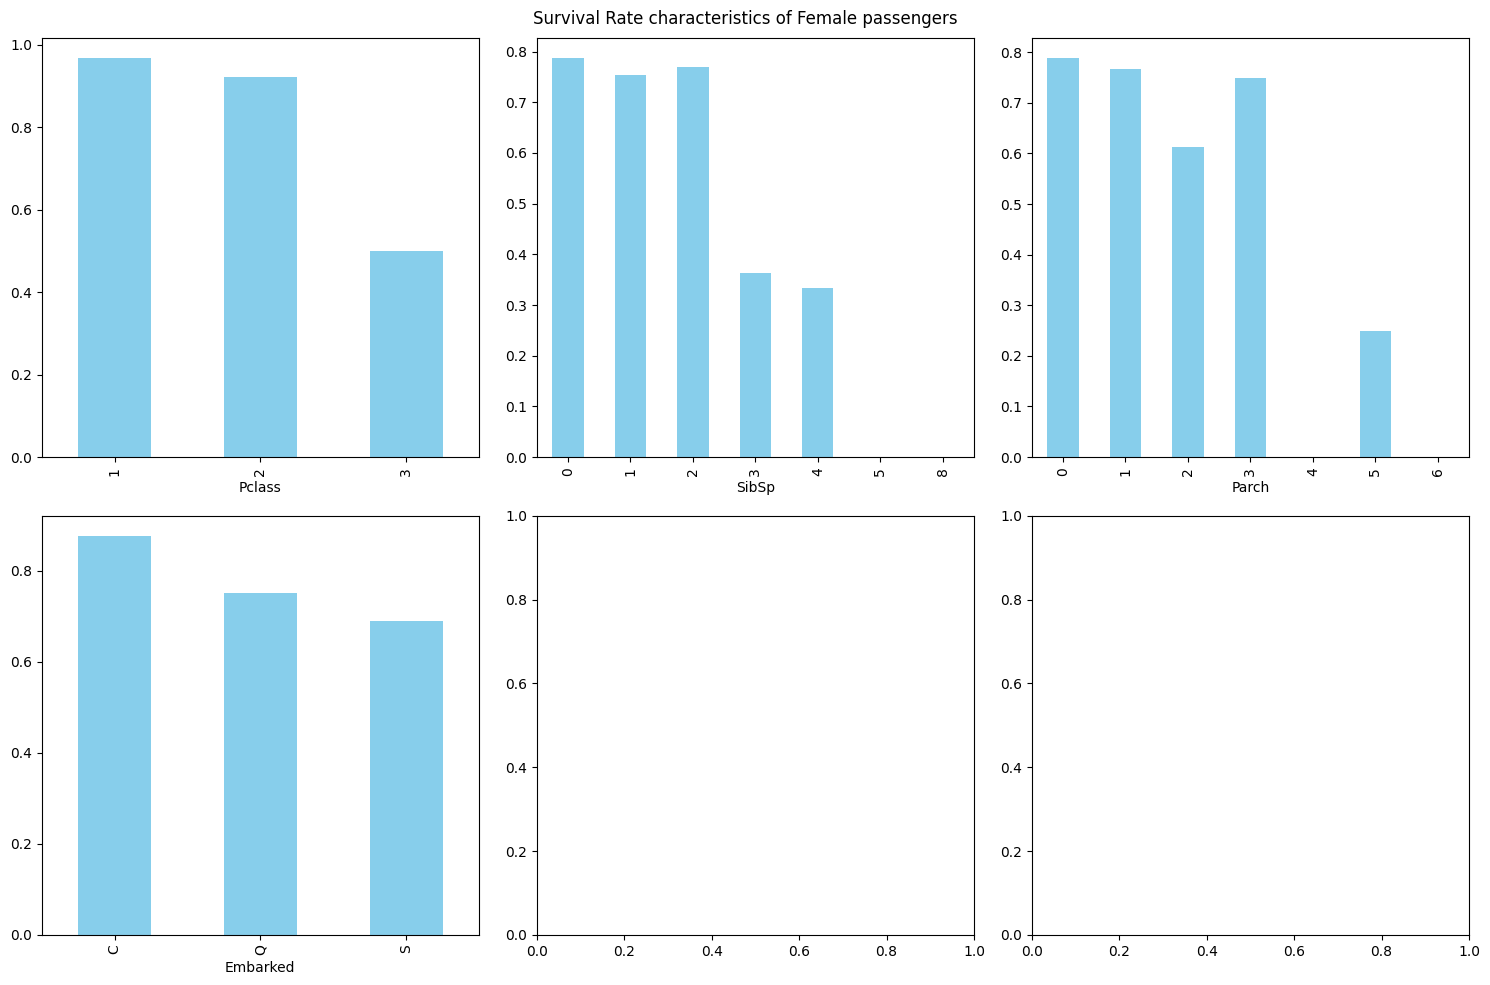

In [186]:
# Make a subplot of every column in df_train as index for the pivot table
df_train_analisis = female_survived.drop(columns=['PassengerId', 'Name', 'Ticket', 'Age', 'Fare', 'Survived', 'Sex'])
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Survival Rate characteristics of Female passengers')

for i, col in enumerate(df_train_analisis.columns):
    pivot = female_survived.pivot_table(index=col, columns='Survived', aggfunc='size', fill_value=0)
    # Survival rate by column
    pivot['Survival Rate'] = pivot[1] / (pivot[0] + pivot[1])
    pivot['Survival Rate'].plot(kind='bar', ax=axs[i//3, i%3], color='skyblue')

plt.tight_layout()
plt.show()


In [187]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title'],
      dtype='object')

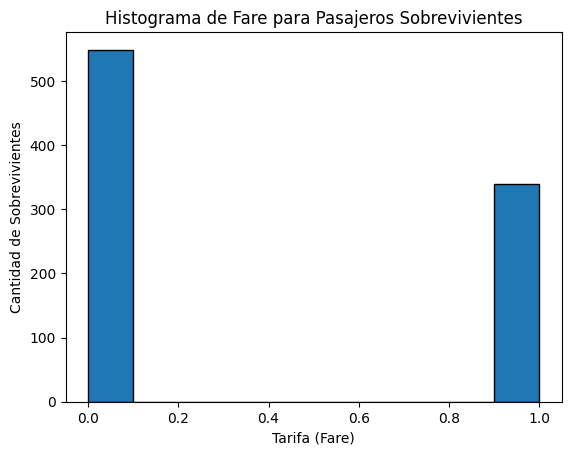

In [188]:
# Filtrar los pasajeros que sobrevivieron
survived = df_train[df_train['Survived'] == 1]

# Crear el histograma directamente para 'Fare' de los que sobrevivieron
plt.hist(df_train['Survived'], bins=10, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Fare para Pasajeros Sobrevivientes')
plt.xlabel('Tarifa (Fare)')
plt.ylabel('Cantidad de Sobrevivientes')

# Mostrar el gráfico
plt.show()

In [189]:
df_train['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

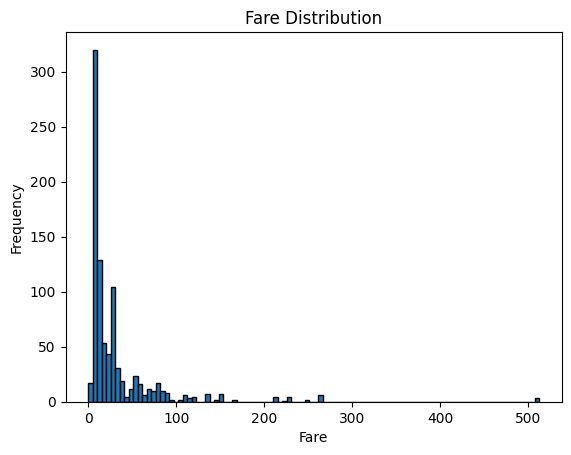

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Fare                   512.3292
Embarked                      C
Title                      Miss
Name: 258, dtype: object


In [190]:
# Graph fare distribution
df_train['Fare'].plot(kind='hist', bins=100, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Show the id of the passenger who paid the most
print(df_train.loc[df_train['Fare'].idxmax()])